# TP1 introduction to Machine Learning
Diane Lingrand (diane.lingrand@univ-cotedazur)

Julie Tores (julie.tores@univ-cotedazur.fr ou julie.tores@etu.univ-cotedazur.fr)

Polytech, SI4, 2023-24

In [102]:
#necessary imports
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## dataset: Iris

In [103]:
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Question 1:** how many data ?

In [104]:
print(len(X))

150


**Question 2**: type of data ? dimension of data ? type of labels ?

In [105]:
# Print type of data
print("Type of data: ", type(X[0][0]))

# Dimensions of data
print("Dimensions of data: ", X.shape)

# Type of label
print("Type of target: ", type(y[0]))

Type of data:  <class 'numpy.float64'>
Dimensions of data:  (150, 4)
Type of target:  <class 'numpy.int32'>


**Question 3:** How many classes ? How many samples per class ?

In [106]:
# How many classes in the data
print("Number of classes: ", len(np.unique(y)))  # On aurait pu aussi faire len(set(y)) mdr malin le prof

# How many samples per class
print("Samples per class: ", np.bincount(y))

Number of classes:  3
Samples per class:  [50 50 50]


**Question 4:** choose 2 dimensions and plot the data in the plane using a different color for each class.

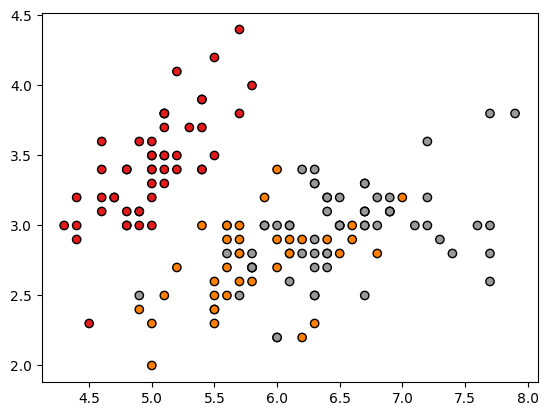

In [107]:
# Rappel : liste[:, 2] permet de récupérer la colonne 2 de la liste, ex: [[1,2,3],[4,5,6]] -> [3,6]
# Rappel 2  : liste[:, :2] permet de récupérer les colonnes 0 et 1 de la liste, ex: [[1,2,3],[4,5,6]] -> [[1,2],[4,5]]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')


**Question 5:** perfect classification. What are the metrics values ? Read the documention of metrics function in scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

accuracy of the perfect classification 1.0
recall of the perfect classification 1.0
f1_score of the perfect classification 1.0


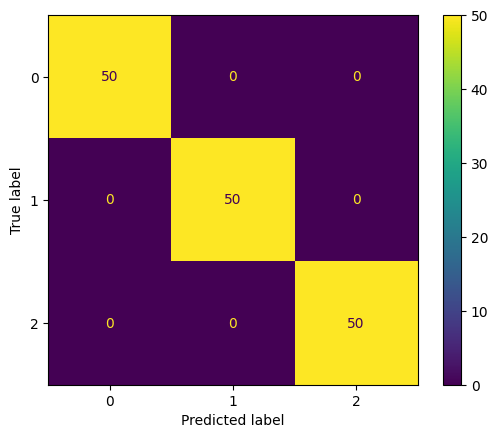

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, confusion_matrix

# here is an example for accuracy: 
print("accuracy of the perfect classification", accuracy_score(y, y))

# recall
print("recall of the perfect classification", recall_score(y, y, average='micro'))

# f1_score
print("f1_score of the perfect classification", f1_score(y, y, average='micro'))

# plot confusion matrix using matplotlib
ConfusionMatrixDisplay(confusion_matrix(y, y)).plot()

**Question 6**: random classification. What are the metrics values ? <br/>
*Hint*: use https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html for the generation of random labels. <br/>
Don't forget the confusion matrix. Hint: ConfusionMatrixDisplay https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

accuracy of the random classification 0.3466666666666667
recall of the random classification 0.31333333333333335
f1_score of the random classification 0.4202480992396959


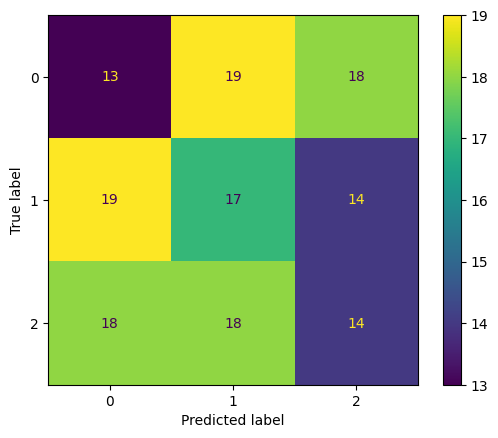

In [109]:
from random import randint

# here is an example for accuracy:
print("accuracy of the random classification", accuracy_score(y, [randint(0, 2) for i in range(len(y))]))

# recall
print("recall of the random classification", recall_score(y, [randint(0, 2) for i in range(len(y))], average='macro'))

# f1_score
print("f1_score of the random classification", f1_score(y, [randint(0, 2) for i in range(len(y))], average='macro'))

# plot confusion matrix using matplotlib
ConfusionMatrixDisplay(confusion_matrix(y, [randint(0, 2) for i in range(len(y))])).plot()

### binary classification

In [110]:
# we choose to remove class with label 2 (Iris Virginica)
XBinaire = X[y!=2]
yBinaire = y[y!=2]

XBinaire.shape

(100, 4)

In [111]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XBinaire, yBinaire, test_size=0.4)
X_train.shape

(60, 4)

**Question 7**: Try to build a classifier better than the random one, use the thresholding on one or more component. Choose the thresholds using the train dataset and compute the metrics on the test dataset.
    

In [1]:
# On va faire un classifier basé sur la moyenne des sepal_length et sepal_width

threshold_sepal_length = np.mean(X_train[:, 0])
threshold_sepal_width = np.mean(X_train[:, 1])

def simple_classifier(x_test, threshold_sepal_length, threshold_sepal_width):
    y_pred = []
    for i in range(len(x_test)):
        if x_test[i][0] < threshold_sepal_length and x_test[i][1] < threshold_sepal_width:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

y_pred = simple_classifier(X_test, threshold_sepal_length, threshold_sepal_width)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy of the simple classifier", accuracy)
print("f1_score of the simple classifier", f1_score)
print("recall of the simple classifier", recall)

NameError: name 'X_train' is not defined

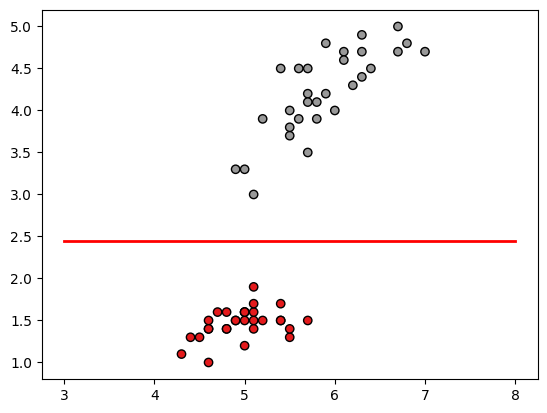

In [113]:
# AUTRE ALTERNATIVE PLUS SIMPLE : on fait juste en fonction de deux features, et on trace la frontière de décision (j'ai choisi 0 et 2 arbitrairement pcq ct joli)

plt.scatter(X_train[:, 0], X_train[:, 2], c=y_train, cmap=plt.cm.Set1, edgecolor='k')


# Frontière de décision (seuil)
plt.plot([3,8], [np.mean([np.max(X_train[y_train==0, 2]), np.min(X_train[y_train==1, 2])]),
                 np.mean([np.max(X_train[y_train==0, 2]), np.min(X_train[y_train==1, 2])])], color='red', linestyle='-', linewidth=2)

**Question 8**: Using this method, could you propose an algorithm for classifying the 3 classes?

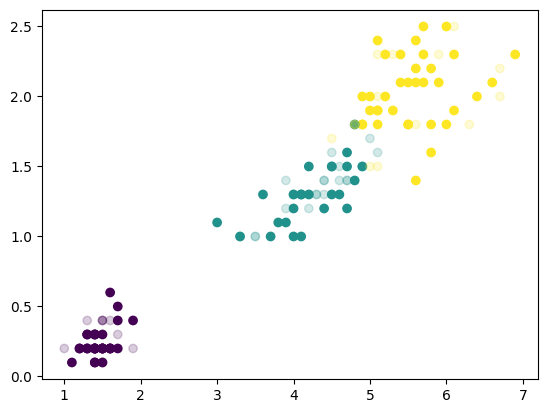

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train)
plt.scatter(X_test[:, 2], X_test[:, 3], c=y_test, alpha=0.2)

# Euh non je propose pas hein

## dataset: digit

In [134]:
# reading the dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

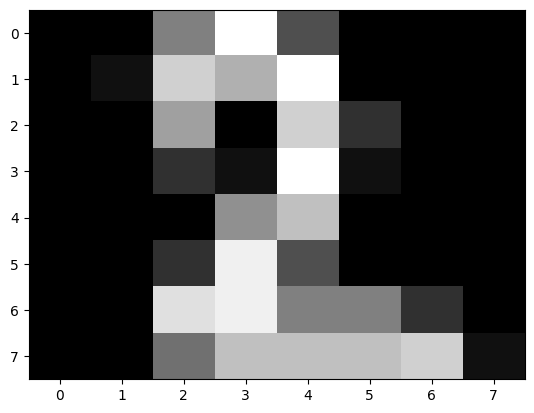

class =  2


In [135]:
#display one of the pictures (the 22th in this code)
import matplotlib.pyplot as plt
i = 22 #index of the image: change it in order to display other images
plt.imshow(X[i].reshape((8,8)),aspect="auto",cmap='gray')
plt.show()
print('class = ', y[i])

**Question 9**: Using the digit dataset, answer again to the previous questions from 1 to 8.

(1797, 64)
Number of classes:  10
Samples per class:  [178 182 177 183 181 182 181 179 174 180]


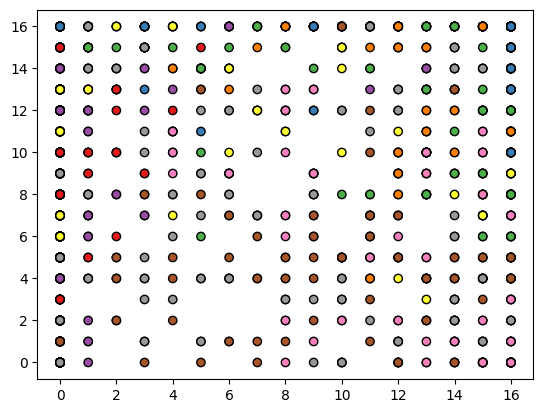

In [137]:
print(X.shape)

# How many classes in the data
print("Number of classes: ", len(np.unique(y)))  # On aurait pu aussi faire len(set(y)) mdr malin le prof

# How many samples per class
print("Samples per class: ", np.bincount(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

plt.scatter(X_train[:, 43], X_train[:, 52], c=y_train, cmap=plt.cm.Set1, edgecolor='k')

In [139]:
# Knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Display the accuracy
print("accuracy of the knn classifier", knn.score(X_test, y_test))

accuracy of the knn classifier 0.9763560500695411


# TP2

Iris dataset : which tree is computed ?

Can you perform better than last week ?

Digits dataset : same questions

Play with the parameters of the decision tree algorithm.

You can continue on the same notebook or write a new one

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
# Pour seeder train/test : x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=YOUR_SEED_AS_INT)

accuracy: 0.95
recall: 0.95
f1_score: 0.9500000000000001


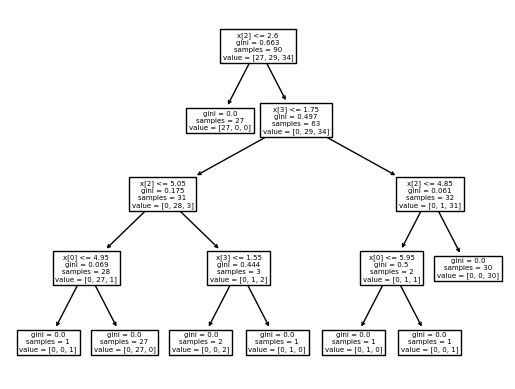

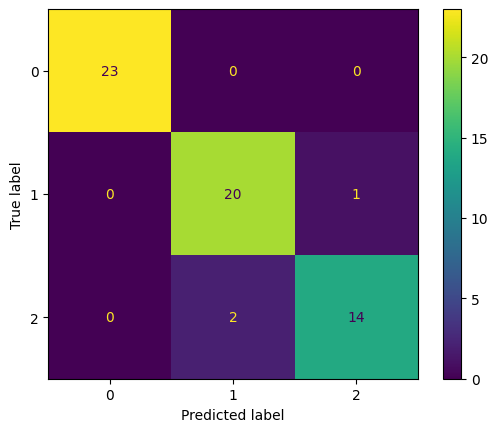

In [ ]:
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, confusion_matrix

clf = tree.DecisionTreeClassifier(max_depth=10)
#  Pour limiter la profondeur de l'arbre : clf = tree.DecisionTreeClassifier(max_depth=3)
#  Pour définir un minimum d'échantillons par feuille : clf = tree.DecisionTreeClassifier(min_samples_leaf=5)
clf = clf.fit(x_train, y_train)
tree.plot_tree(clf)

y_pred = clf.predict(x_test)

# Display the accuracy
print("accuracy:", accuracy_score(y_test, y_pred))
# Recall
print("recall:", recall_score(y_test, y_pred, average='micro'))
# F1 score
print("f1_score:", f1_score(y_test, y_pred, average='micro'))

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, clf.predict(x_test))).plot()

### Digits

In [74]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

accuracy: 0.8555555555555555
recall: 0.8555555555555555
f1_score: 0.8555555555555555


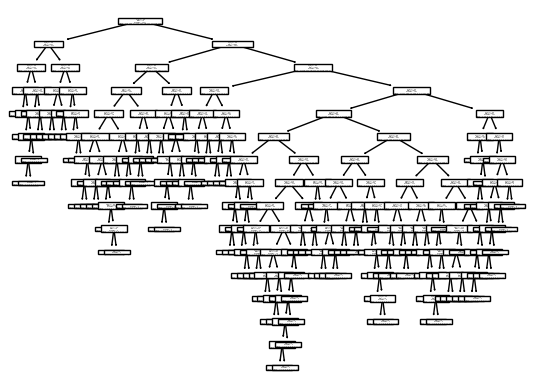

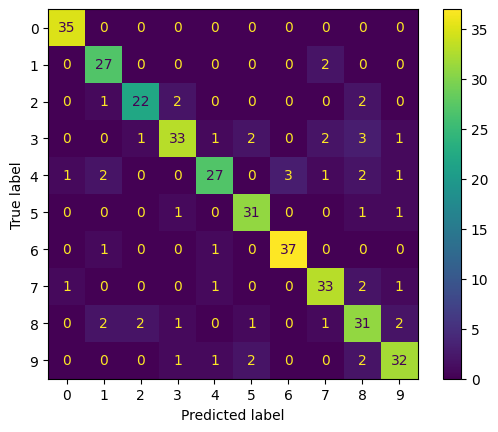

In [75]:
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, confusion_matrix

clf = tree.DecisionTreeClassifier()
#  Pour limiter la profondeur de l'arbre : clf = tree.DecisionTreeClassifier(max_depth=3)
#  Pour définir un minimum d'échantillons par feuille : clf = tree.DecisionTreeClassifier(min_samples_leaf=5)
clf = clf.fit(x_train, y_train)
tree.plot_tree(clf)

y_pred = clf.predict(x_test)

print("accuracy:", accuracy_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred, average='micro'))
print("f1_score:", f1_score(y_test, y_pred, average='micro'))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Validation set

In [76]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.2)

### Let's find the best hyperparameters for the decision tree

best parameters: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 37}
accuracy: 0.84375
recall: 0.84375
f1_score: 0.84375


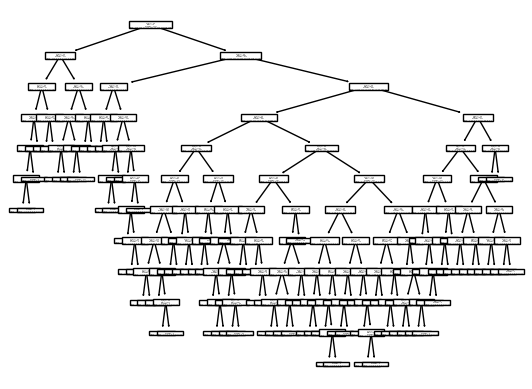

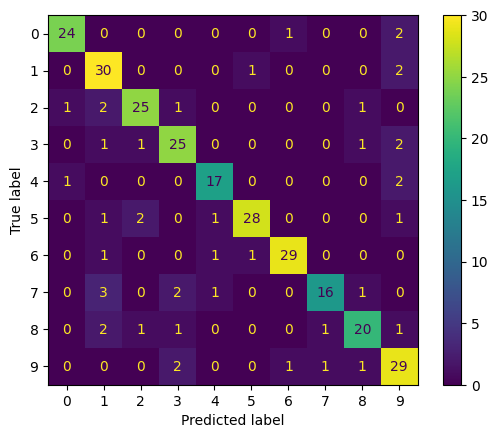

In [77]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'max_depth': [i for i in range(14, 60)], 'min_samples_leaf': [i for i in range(1, 5)], 'min_samples_split': [i for i in range(2, 20, 2)]}

# Avec GridSearchCV
#clf = tree.DecisionTreeClassifier()
#clf = GridSearchCV(clf, parameters)
#clf.fit(x_train, y_train)

# Avec RandomizedSearchCV
clf = tree.DecisionTreeClassifier()
clf = RandomizedSearchCV(clf, parameters, n_iter=50, random_state=42)
clf.fit(x_train2, y_train2)

tree.plot_tree(clf.best_estimator_)

y_pred = clf.best_estimator_.predict(x_val)

print("best parameters:", clf.best_params_)
print("accuracy:", accuracy_score(y_val, y_pred))
print("recall:", recall_score(y_val, y_pred, average='micro'))
print("f1_score:", f1_score(y_val, y_pred, average='micro'))

ConfusionMatrixDisplay.from_predictions(y_val, y_pred)

### Test set

best parameters: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 37}
accuracy: 0.8305555555555556
recall: 0.8305555555555556
f1_score: 0.8305555555555556


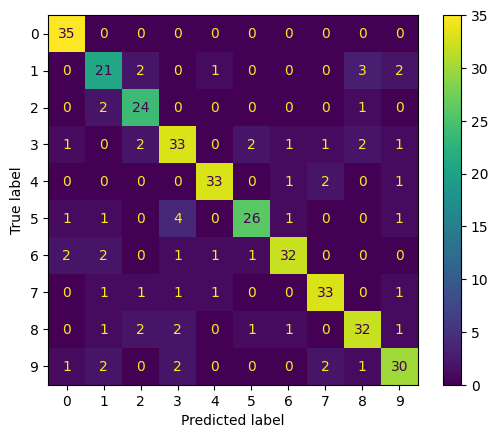

In [78]:
y_pred = clf.best_estimator_.predict(x_test)

print("best parameters:", clf.best_params_)
print("accuracy:", accuracy_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred, average='micro'))
print("f1_score:", f1_score(y_test, y_pred, average='micro'))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

PCA

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA